## Numerical methods project

In [16]:
import numpy as np 
import matplotlib.pyplot as plt 

#### Define the function 

In [17]:
def f(x):
    '''
    FUNCTION TO BE OPTIMISED
    '''
    d = len(x)
    return sum(75*(x[i+1]-x[i]**2)**2 + (x[i]-1)**2 for i in range(d-1))

#### Define gradient

In [18]:
def grad(f,x): 
    '''
    CENTRAL FINITE DIFFERENCE CALCULATION
    '''
    h = np.cbrt(np.finfo(float).eps)
    d = len(x)
    nabla = np.zeros(d)
    for i in range(d): 
        x_for = np.copy(x) 
        x_back = np.copy(x)
        x_for[i] += h 
        x_back[i] -= h 
        nabla[i] = (f(x_for) - f(x_back))/(2*h) 
    return nabla 

#### Define line search

In [19]:
def line_search(f,x,p,nabla):
    '''
    BACKTRACK LINE SEARCH WITH WOLFE CONDITIONS
    '''
    a = 1
    c1 = 1e-4 
    c2 = 0.9 
    fx = f(x)
    x_new = x + a * p 
    nabla_new = grad(f,x_new)
    while f(x_new) >= fx + (c1*a*nabla.T@p) or nabla_new.T@p <= c2*nabla.T@p : 
        a *= 0.5
        x_new = x + a * p 
        nabla_new = grad(f,x_new)
    return a

#### BFGS algorithm

In [20]:
def BFGS(f,x0,max_it,plot=False):
    '''
    DESCRIPTION
    BFGS Quasi-Newton Method, implemented as described in Nocedal:
    Numerical Optimisation.


    INPUTS:
    f:      function to be optimised 
    x0:     intial guess
    max_it: maximum iterations 
    plot:   if the problem is 2 dimensional, returns 
            a trajectory plot of the optimisation scheme.

    OUTPUTS: 
    x:      the optimal solution of the function f 

    '''
    d = len(x0) # dimension of problem 
    nabla = grad(f,x0) # initial gradient 
    H = np.eye(d) # initial hessian
    x = x0[:]
    it = 2 
    if plot == True: 
        if d == 2: 
            x_store =  np.zeros((1,2)) # storing x values 
            x_store[0,:] = x 
        else: 
            print('Too many dimensions to produce trajectory plot!')
            plot = False

    while np.linalg.norm(nabla) > 1e-5: # while gradient is positive
        if it > max_it: 
            print('Maximum iterations reached!')
            break
        it += 1
        p = -H@nabla # search direction (Newton Method)
        a = line_search(f,x,p,nabla) # line search 
        s = a * p 
        x_new = x + a * p 
        nabla_new = grad(f,x_new)
        y = nabla_new - nabla 
        y = np.array([y])
        s = np.array([s])
        y = np.reshape(y,(d,1))
        s = np.reshape(s,(d,1))
        r = 1/(y.T@s)
        li = (np.eye(d)-(r*((s@(y.T)))))
        ri = (np.eye(d)-(r*((y@(s.T)))))
        hess_inter = li@H@ri
        H = hess_inter + (r*((s@(s.T)))) # BFGS Update
        nabla = nabla_new[:] 
        x = x_new[:]
        if plot == True:
            x_store = np.append(x_store,[x],axis=0) # storing x
    if plot == True:
        x1 = np.linspace(min(x_store[:,0]-0.5),max(x_store[:,0]+0.5),30)
        x2 = np.linspace(min(x_store[:,1]-0.5),max(x_store[:,1]+0.5),30)
        X1,X2 = np.meshgrid(x1,x2)
        Z = f([X1,X2])
        plt.figure()
        plt.title('OPTIMAL AT: '+str(x_store[-1,:])+'\n IN '+str(len(x_store))+' ITERATIONS')
        plt.contourf(X1,X2,Z,30,cmap='jet')
        plt.colorbar()
        plt.plot(x_store[:,0],x_store[:,1],c='w')
        plt.xlabel('$x_1$'); plt.ylabel('$x_2$')
        plt.show()
    return x


#### Execute the BFGS algorithm

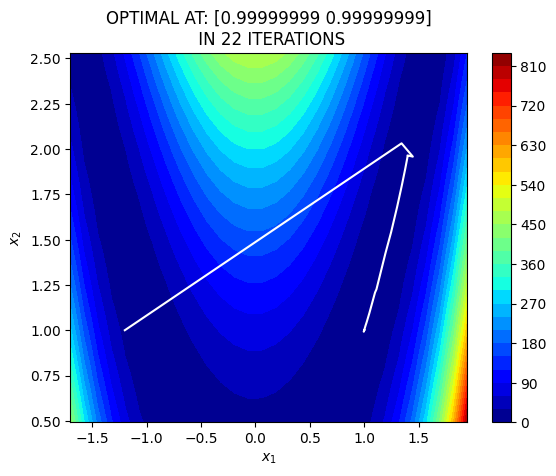

In [21]:
x_opt = BFGS(f,[-1.2,1],100,plot=True)